In [1]:
import pandas as pd
import numpy as np
import plotly 
import os
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\envs\env_mlf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
ROOT = ".."
dataDir = os.path.join(ROOT, "02 data input")
outputDir = '.'

list(os.listdir(dataDir))

['.DS_Store',
 '510050.OF_ETF.csv',
 'README.md',
 'wind全A.csv',
 '利率类20070901-20200308.csv',
 '商品类20070901-20200308.csv',
 '用wind全A算市场动量和交易活跃指标.csv',
 '股票指数类 20070901-20200308.csv']

In [3]:
rawRateDf = pd.read_csv(os.path.join(dataDir, '利率类20070901-20200308.csv'))
rawCommodityDf = pd.read_csv(os.path.join(dataDir, '商品类20070901-20200308.csv'))
rawStockIndexDf = pd.read_csv(os.path.join(dataDir, '股票指数类 20070901-20200308.csv'))
rawWindADf = pd.read_csv(os.path.join(dataDir, '用wind全A算市场动量和交易活跃指标.csv'))
rawETFDf = pd.read_csv(os.path.join(dataDir, '510050.OF_ETF.csv'), sep='\t')

In [4]:
def getPctChange(df, days = 5):
    df_pctChange5 = df.pct_change(days)
    df_pctChange5.columns = map(lambda x: x+'_pctChange5', df_pctChange5.columns )
    return(df_pctChange5)


In [5]:
bankRateDf = rawRateDf.iloc[:,[0, 3, 5, 6]]
bankRateDf.columns = bankRateDf.loc[2, :]
bankRateDf = bankRateDf.drop([0,1,2]).rename(columns={'指标名称':'date'})
bankRateDf.columns.rename('', inplace = True)
bankRateDf = bankRateDf.set_index('date')
bankRateDf = bankRateDf.astype(float)
bankRateDf.index = pd.DatetimeIndex(bankRateDf.index)
bankRateDf.describe()

,IBO001,R007,B0
count,3124.000000,3124.000000,3124.000000
mean,2.403769,3.013102,3.010557
std,0.944573,1.121663,1.123348
min,0.806400,0.872100,0.000000
25%,1.904675,2.421650,2.416575
50%,2.362850,2.891450,2.891100
75%,2.796675,3.486275,3.485500
max,13.828400,11.621700,11.649300


In [6]:
bankRateDf_pctChange5 = getPctChange(bankRateDf)


In [7]:
rateDf = rawRateDf
rateDf.columns = rateDf.loc[2, :]
rateDf = rateDf.drop([0,1,2])
rawShiborDf = rateDf.loc[:,['指标名称', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M']].rename(columns={'指标名称':'date'})
rawShiborDf.columns.rename('', inplace = True)
shiborDf = rawShiborDf.set_index('date')
shiborDf = shiborDf.astype(float)
shiborDf.index = pd.DatetimeIndex(shiborDf.index)
shiborDf.describe()

,SHIBORO/N,SHIBOR1W,SHIBOR2W,SHIBOR1M,SHIBOR3M,SHIBOR6M
count,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000
mean,2.371428,2.909930,3.245447,3.554382,3.709087,3.733134
std,0.938888,1.092244,1.221094,1.295622,1.168799,1.057721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.891375,2.364000,2.615750,2.741000,2.848650,2.930275
50%,2.329000,2.757000,3.092350,3.438750,3.881650,4.100000
75%,2.750000,3.314600,3.816500,4.200750,4.601300,4.585950
max,13.444000,11.004000,13.578600,9.698000,6.461100,5.524200


In [8]:
shiborDf_pctChange5 = getPctChange(shiborDf)


In [9]:
rawGBondDf = rateDf.iloc[:,[0, -3, -2, -1]].rename(columns={'指标名称':'date'})
rawGBondDf.columns.rename('', inplace = True)
GBondDf = rawGBondDf.set_index('date')
GBondDf = GBondDf.astype(float)
GBondDf.index = pd.DatetimeIndex(GBondDf.index)
GBondDf.describe()

,国债到期收益率:6个月,国债到期收益率:1年,国债到期收益率:2年
count,3124.000000,3124.000000,3124.000000
mean,2.506647,2.618128,2.781013
std,0.927391,0.895265,0.884020
min,0.000000,0.000000,0.000000
25%,2.099350,2.199200,2.376025
50%,2.616150,2.739800,2.890100
75%,3.210650,3.315450,3.422800
max,4.562100,4.210900,4.450700


In [10]:
GBondDf_pctChange5 = getPctChange(GBondDf)


In [13]:
commodityDf = rawCommodityDf
commodityDf.columns = commodityDf.loc[2, :]
commodityDf = commodityDf.drop([0,1,2])
commodityDf = commodityDf.rename(columns={'指标名称':'date'})
commodityDf.columns.rename('', inplace = True)
commodityDf = commodityDf.set_index('date')
commodityDf = commodityDf.applymap(lambda x: x.replace(',', ''))
commodityDf = commodityDf.astype(float)
commodityDf.index = pd.DatetimeIndex(commodityDf.index)
commodityDf['COMEX黄金/WTI原油'] = commodityDf['期货收盘价(连续):COMEX黄金']/commodityDf['期货结算价(连续):布伦特原油']
commodityDf.loc[(commodityDf['期货收盘价(连续):COMEX黄金']==0) & (commodityDf['期货结算价(连续):布伦特原油']==0), 'COMEX黄金/WTI原油']=0
commodityDf.describe()

,南华综合指数,CRB现货指数:综合,期货收盘价(连续):COMEX黄金,期货结算价(连续):布伦特原油,COMEX黄金/WTI原油
count,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,1188.664716,425.825171,1199.426560,79.394534,16.473527
std,364.062953,93.348612,370.958691,26.587569,6.921207
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1085.160000,410.010000,1102.000000,57.370000,12.706271
50%,1315.710000,431.540000,1253.900000,75.340000,15.672541
75%,1400.880000,475.460000,1370.300000,106.980000,21.111897
max,1676.880000,580.320000,1873.700000,146.080000,41.473719


In [14]:
commodityDf_pctChange5 = getPctChange(commodityDf)


In [15]:
stockIndexDf = rawStockIndexDf.iloc[:,[0, 1, 4, 7]].rename(columns={'Unnamed: 0':'date'})
stockIndexDf = stockIndexDf.drop([0,1,2])
stockIndexDf = stockIndexDf.set_index('date')
stockIndexDf = stockIndexDf.astype(float)
stockIndexDf.index = pd.DatetimeIndex(stockIndexDf.index)
stockIndexDf.describe()

,标普500,日经225,上证综指
count,3042.000000,3042.000000,3042.000000
mean,12065.780319,965.131272,2886.012127
std,4441.714580,241.461212,705.185106
min,4624.420800,486.814800,1706.703000
25%,8479.905825,765.054200,2350.257000
50%,11220.996150,912.362700,2878.561500
75%,15727.692400,1153.136725,3163.843550
max,23707.113400,1539.544400,6092.057000


In [16]:
stockIndexDf_pctChange5 = getPctChange(stockIndexDf)

# 還要算 ETF 波動率

In [17]:
ETFDf = rawETFDf.iloc[:,[2,4, 5, 6, 7]].rename(columns={'日期':'date',
                                                                '收盘价(元)':'50ETF_close',
                                                                '开盘价(元)':'50ETF_open',
                                                                '最高价(元)':'50ETF_high',
                                                                '最低价(元)':'50ETF_low',
                                                            })
ETFDf = ETFDf.set_index('date')
ETFDf = ETFDf.astype(float)
ETFDf.index = pd.DatetimeIndex(ETFDf.index)
ETFDf = ETFDf.iloc[:-2]
ETFDf

,50ETF_open,50ETF_high,50ETF_low,50ETF_close
date,,,,
2007-09-03,4.08,4.16,4.08,4.16
2007-09-04,4.16,4.16,4.08,4.09
2007-09-05,4.09,4.12,4.00,4.08
2007-09-06,4.09,4.15,4.08,4.13
2007-09-07,4.11,4.12,4.05,4.06
...,...,...,...,...
2020-03-02,2.83,2.92,2.83,2.90
2020-03-03,2.93,2.94,2.90,2.91
2020-03-04,2.90,2.94,2.90,2.94


In [18]:
ETFReturn = ETFDf['50ETF_close'].pct_change()
ETFVolatility60 = ETFReturn.rolling(60).cov().rename('ETFVolatility60')
ETFVolatility120 = ETFReturn.rolling(120).cov().rename('ETFVolatility120')
ETFVolatilityDf = pd.concat([ETFVolatility60, ETFVolatility120], axis = 1)
ETFVolatilityDf

,ETFVolatility60,ETFVolatility120
date,,
2007-09-03,NaN,NaN
2007-09-04,NaN,NaN
2007-09-05,NaN,NaN
2007-09-06,NaN,NaN
2007-09-07,NaN,NaN
...,...,...
2020-03-02,0.000215,0.000135
2020-03-03,0.000212,0.000135
2020-03-04,0.000211,0.000135


In [19]:
ETFVolatilityDf_pctChange5 = getPctChange(ETFVolatilityDf)

# Wind A data for 市场动量指标

In [20]:
windADf = rawWindADf.iloc[:, :7]
windADf.columns = windADf.loc[2, :]
windADf = windADf.drop([0,1,2])
windADf = windADf.rename(columns={'Date':'date'})
windADf.columns.rename('', inplace = True)
windADf = windADf.set_index('date')
windADf = windADf.astype(float)
windADf.index = pd.DatetimeIndex(windADf.index)
# windADf.set_index('date')
windADf

,pre_close,open,high,low,close,volume
date,,,,,,
2007-09-03,3804.9426,3804.9426,3899.7930,3804.9424,3890.7791,1.934243e+10
2007-09-04,3890.7791,3890.7791,3902.2720,3837.4065,3854.9917,1.833770e+10
2007-09-05,3854.9917,3854.9917,3878.2273,3794.1196,3864.7783,1.494567e+10
2007-09-06,3864.7783,3864.7783,3923.1470,3864.7783,3903.8408,1.626460e+10
2007-09-07,3903.8408,3903.8408,3903.8408,3814.7722,3819.8743,1.825542e+10
...,...,...,...,...,...,...
2020-03-02,4304.3983,4344.8047,4481.2238,4343.9159,4459.3354,8.981298e+10
2020-03-03,4459.3354,4527.9825,4572.9330,4466.1885,4499.4858,1.010211e+11
2020-03-04,4499.4858,4476.6701,4522.9884,4449.4815,4522.9642,8.653929e+10


# mkt Momentum 
???RSI=Sum(Max(Close-LastClose,0),N,1)/Sum(ABS(Close-LastClose),N,1)*100??????

In [23]:
mktVolume = windADf['volume'].rename('mktVolume')
mktVolume_pctChange5 = mktVolume.pct_change(5).rename('mktVolume_pctChange5')
mktClose_pctChange5 = windADf['close'].pct_change(5).rename('mktClose_pctChange5')
mktClose_pctChange5
mktMomentumDf = pd.concat([mktVolume, mktVolume_pctChange5, mktClose_pctChange5], axis = 1)
mktMomentumDf

,mktVolume,mktVolume_pctChange5,mktClose_pctChange5
date,,,
2007-09-03,1.934243e+10,NaN,NaN
2007-09-04,1.833770e+10,NaN,NaN
2007-09-05,1.494567e+10,NaN,NaN
2007-09-06,1.626460e+10,NaN,NaN
2007-09-07,1.825542e+10,NaN,NaN
...,...,...,...
2020-03-02,8.981298e+10,-0.092354,-0.025796
2020-03-03,1.010211e+11,-0.136910,-0.017754
2020-03-04,8.653929e+10,-0.250106,0.005961


In [24]:
X_df = pd.concat([bankRateDf, bankRateDf_pctChange5,
                shiborDf, shiborDf_pctChange5,
                GBondDf, GBondDf_pctChange5,
                commodityDf, commodityDf_pctChange5,
                stockIndexDf, stockIndexDf_pctChange5,
                ETFVolatilityDf, ETFVolatilityDf_pctChange5,
                mktMomentumDf
               ], axis = 1)

X_df.to_csv(os.path.join(outputDir, 'factor.csv'))
X_df.to_pickle(os.path.join(outputDir, 'factor.pkl'))

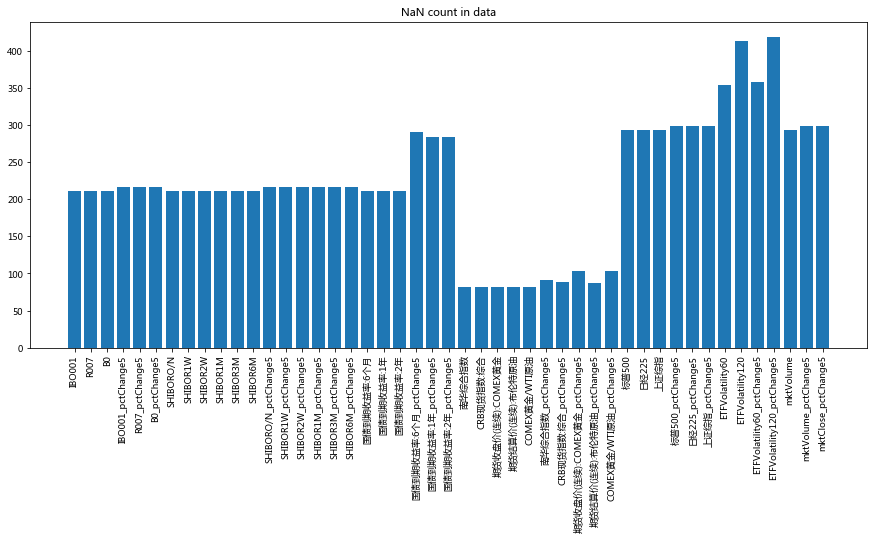

In [25]:
nas_df = X_df.isna()
nas_df.resample('Y').sum()



from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式
mpl.rcParams['font.size'] = 9 



plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()

In [2]:
import pandas_profiling 
X_df = pd.read_pickle('factor.pkl')
profile = pandas_profiling.ProfileReport(X_df)
profile.to_file(outputfile="report.html")